<a href="https://colab.research.google.com/github/LFernandoTM/CO2_Emissions/blob/main/Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
%load_ext google.colab.data_table
co2_emissions = pd.read_csv ("co2_emissions.csv")
co2_emissions

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Country,1990,2005,2017,2021
0,World,22674.120,30049.810,37077.400,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [55]:
#remove no countries rows
co2_emissions_countries = co2_emissions[co2_emissions['Country'].str.contains("World|European Union") == False].reset_index(drop=True)
co2_emissions_countries

,Country,1990,2005,2017,2021
0,Afghanistan,2.546,1.063,11.422,8.35
1,Albania,6.583,4.196,5.026,4.59
2,Algeria,65.677,98.197,159.929,173.00
3,Angola,5.851,15.975,30.876,24.45
4,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
203,Vietnam,20.182,99.231,218.729,321.41
204,Western Sahara,0.144,0.227,0.276,0.24
205,Yemen,6.887,21.768,12.503,12.05
206,Zambia,2.955,2.457,4.967,7.01


In [56]:
#sort by 2021 values
countries_highest_co2 = co2_emissions_countries.sort_values(by='2021', ascending=False)
#check top 5 countries with higher co2 emissions
top_5 = countries_highest_co2.head(5)

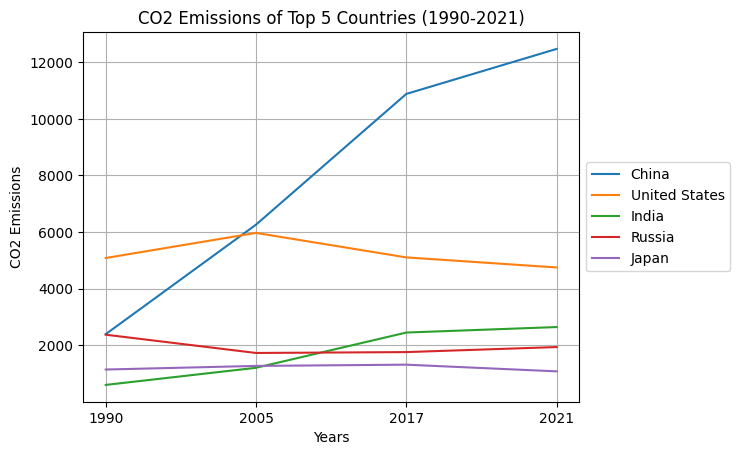

In [57]:
#creating plot top 5 countries
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
years = top_5.columns[1:]
for country, row in top_5.iterrows():
  plt.plot(years, row[1:], label = row[0])

plt.title('CO2 Emissions of Top 5 Countries (1990-2021)')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()

In [58]:
# add columns with increasing/decreasing per year since 1990
co2_emissions_countries
co2_emissions_countries[' 1990'] = 100
co2_emissions_countries[' 2005'] = ((co2_emissions_countries['2005'] / co2_emissions_countries['1990']) * 100)
co2_emissions_countries[' 2017'] = ((co2_emissions_countries['2017'] / co2_emissions_countries['1990']) * 100)
co2_emissions_countries[' 2021'] = ((co2_emissions_countries['2021'] / co2_emissions_countries['1990']) * 100)


In [59]:
#sort and check top 3 countries
co2_emissions_increased = co2_emissions_countries.sort_values(by=' 2021', ascending=False)
top_3 = co2_emissions_increased.head(3)


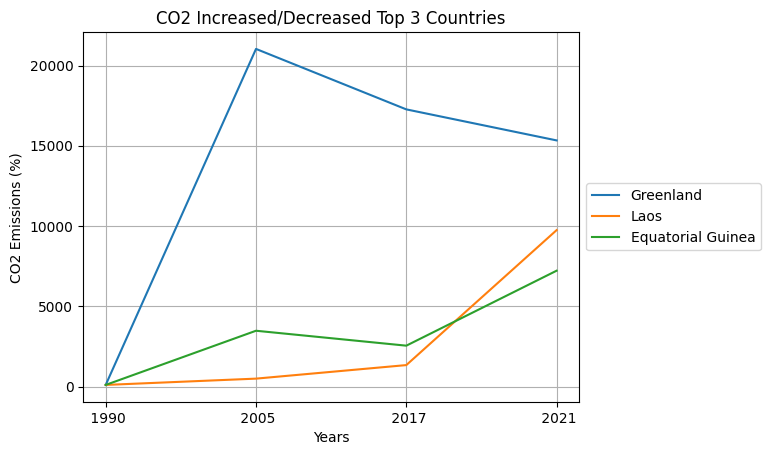

In [60]:
fig, ax = plt.subplots()
years = top_3.columns[5:]
for country, row in top_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

plt.title('CO2 Increased/Decreased Top 3 Countries')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (%)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()

In [61]:
co2_emissions_increased = co2_emissions_countries.sort_values(by=' 2021', ascending=False)
bottom_3 = co2_emissions_increased.tail(3)

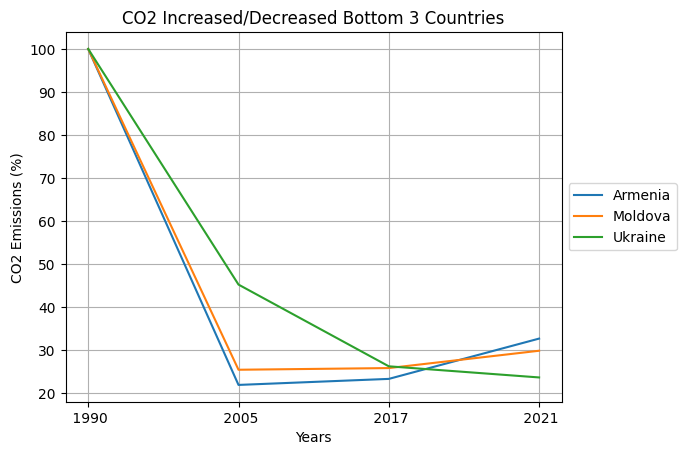

In [62]:
fig, ax = plt.subplots()
years = bottom_3.columns[5:]
for country, row in bottom_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

plt.title('CO2 Increased/Decreased Bottom 3 Countries')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (%)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()

In [63]:
# Filter and select top and bottom three countries
co2_emissions_increased_filtered = co2_emissions_increased[co2_emissions_increased['1990'] >= 5]
co2_emissions_increased_filtered_graph2 = co2_emissions_increased_filtered.sort_values(by=' 2021', ascending=False)
top_three_filtered = co2_emissions_increased_filtered_graph2.head(3)
bottom_three_filtered = co2_emissions_increased_filtered_graph2.tail(3)

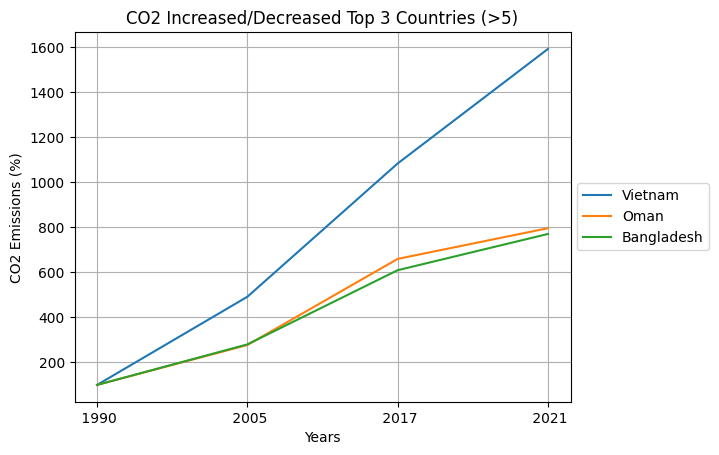

In [64]:
fig, ax = plt.subplots()
years = top_three_filtered.columns[5:]
for country, row in top_three_filtered.iterrows():
  plt.plot(years, row[5:], label = row[0])

plt.title('CO2 Increased/Decreased Top 3 Countries (>5)')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (%)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()

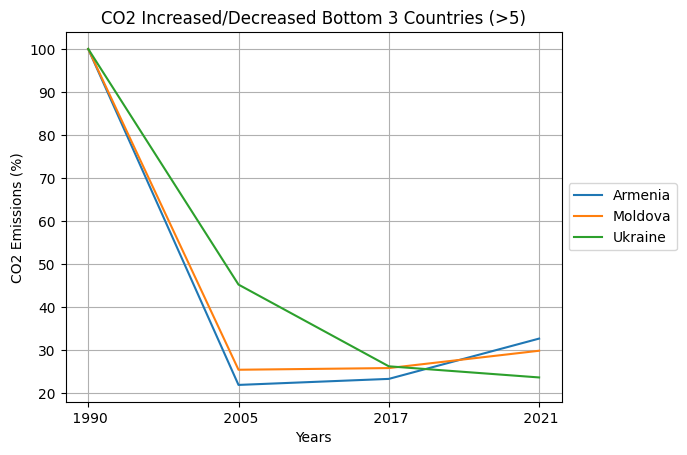

In [65]:
fig, ax = plt.subplots()
years = bottom_three_filtered.columns[5:]
for country, row in bottom_three_filtered.iterrows():
  plt.plot(years, row[5:], label = row[0])

plt.title('CO2 Increased/Decreased Bottom 3 Countries (>5)')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (%)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()